LEVEL 2

TASK 1 - Restaurant Ratings

1. Analyze the distnbuuon of aggregate ratings and determtne the most commo rating range.

Rating distribution: 
Rating
3.2    522
3.1    519
3.4    498
3.3    483
3.5    480
3.0    468
3.6    458
3.7    427
3.8    400
2.9    381
3.9    335
2.8    315
4.1    274
4.0    266
2.7    250
4.2    221
2.6    191
4.3    174
4.4    144
2.5    110
4.5     95
2.4     87
4.6     78
4.9     61
2.3     47
4.7     42
2.2     27
4.8     25
2.1     15
2.0      7
1.9      2
1.8      1
Name: count, dtype: int64


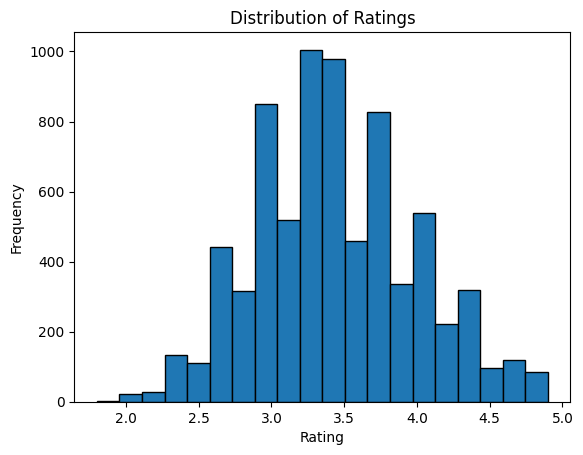

The most common rating range is: [3.2]
Rating range (excluding 0.0): 1.8 to 4.9


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans

data = pd.read_csv("Dataset.csv")
data.head()

data.rename(columns={'Aggregate rating': 'Rating'}, inplace=True)

data_filtered = data[data['Rating'] > 0.0]
rating_counts = data_filtered['Rating'].value_counts()
print("Rating distribution: ")
print(rating_counts)

plt.hist(data_filtered['Rating'], bins=20, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

mode_values = data_filtered['Rating'].mode().values

rating_min = data_filtered['Rating'].min()
rating_max = data_filtered['Rating'].max()

print(f"The most common rating range is: {mode_values}")
print(f"Rating range (excluding 0.0): {rating_min} to {rating_max}")

2. Calculate the average number of votes recetved by restaurants

In [2]:
average_votes = data['Votes'].mean()

print(f"The average number of votes received by restaurants is: {average_votes:.2f}")

The average number of votes received by restaurants is: 156.91


TASK 2 - Cuisane Combination

1. Identify the most common combinations of cuisines tn the dataset

In [3]:
cuisine_combinations = data['Cuisines'].dropna()
combination_counts = cuisine_combinations.value_counts()
most_common_cuisines = combination_counts.head(2)
print("Most common combinations of cuisines: ")
print(most_common_cuisines)

Most common combinations of cuisines: 
Cuisines
North Indian             936
North Indian, Chinese    511
Name: count, dtype: int64


2. Determine if certain cuisine combinations tend to have higher ratings.

In [6]:
df_combinations = pd.DataFrame({'Cuisines': most_common_cuisines.index, 'Counts': most_common_cuisines.values})
data = pd.merge(data, df_combinations, on='Cuisines', how='left')
overall_average_rating = data['Rating'].mean()
average_rating_most_common = data.groupby('Cuisines')['Rating'].mean()
most_common_higher_than_average = average_rating_most_common > overall_average_rating
print("\n Overall Average Rating: ", overall_average_rating)
print("\n Average Rating for most common combinations: ")
print(average_rating_most_common)
print("\n Do the Two Most Common Combinations Have Higher Rating Than the Overall Average? ")
print(most_common_higher_than_average[most_common_cuisines.index])


 Overall Average Rating:  2.66637001361114

 Average Rating for most common combinations: 
Cuisines
Afghani                                      0.725
Afghani, Mughlai, Chinese                    0.000
Afghani, North Indian                        0.000
Afghani, North Indian, Pakistani, Arabian    0.000
African                                      4.700
                                             ...  
Western, Asian, Cafe                         4.200
Western, Fusion, Fast Food                   3.200
World Cuisine                                4.900
World Cuisine, Mexican, Italian              4.400
World Cuisine, Patisserie, Cafe              4.200
Name: Rating, Length: 1825, dtype: float64

 Do the Two Most Common Combinations Have Higher Rating Than the Overall Average? 
Cuisines
North Indian             False
North Indian, Chinese    False
Name: Rating, dtype: bool


TASK 3 - Geographic Analysis    

1. Plot the locations of restaurants on a map using longitude and Latitude coordinates.

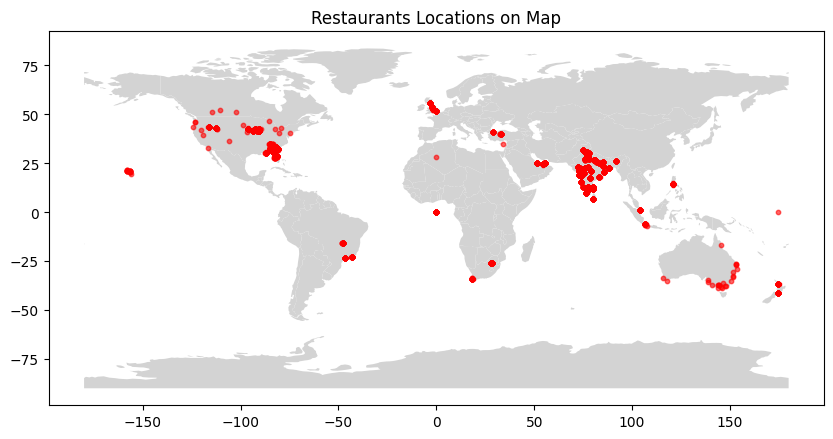

In [7]:
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
geo_df = gpd.GeoDataFrame(data, geometry=geometry)
world = gpd.read_file('D:/PROJECTS/COGNIFYZ/110m_cultural/ne_110m_admin_0_countries.shp')
# Plot the map
fig, ax = plt.subplots(figsize=(10,8))
world.plot(ax=ax, color='lightgrey')
#plot the restaurant locations
geo_df.plot(ax=ax, markersize=10, color='red', alpha=0.6)
plt.title('Restaurants Locations on Map')
plt.show()

2. Identify any patterns or clusters of restaurants in specific areas


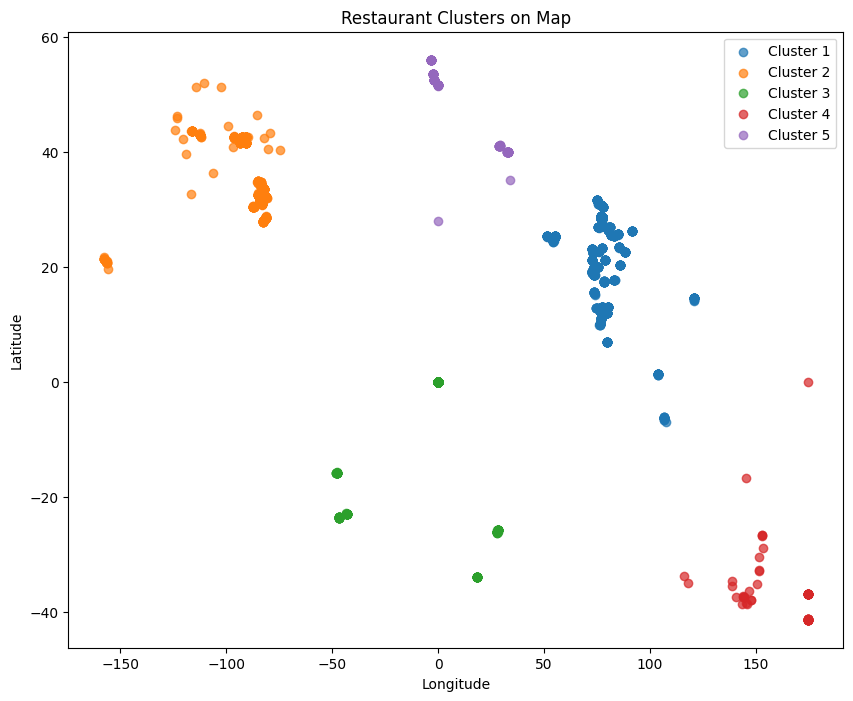

In [8]:
coordinates = data[['Longitude', 'Latitude']]
#Choose the number of clusters
num_clusters = 5
# Apply KMeans clustering 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(coordinates)
#Plot the clusters on a map
plt.figure(figsize=(10,8))
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster + 1}', alpha=0.7)

plt.title('Restaurant Clusters on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

TASK 4 - Restaurant Chams

1. Identify if there are any restaurtant chains present in the dataset. Analyze the ratings and popularity of different restaurant chains.

In [10]:
chain_data = data.groupby('Restaurant Name').agg({
    'Rating': 'mean',
    'Votes': 'sum',
    'Longitude': 'first',
    'Latitude': 'first'
}).reset_index()
print("Chain Data: ")
print(chain_data.head())
#Analyze Ratings and Popularity
sorted_chain_data = chain_data.sort_values(by=['Rating','Votes'], ascending=[False,False])
print("\n Top Chains by Rating: ")
print(sorted_chain_data[['Restaurant Name', 'Rating']].head())
print("\n Top Chains by Popularity (Votes): ")
print(sorted_chain_data[['Restaurant Name', 'Votes']].head())

Chain Data: 
  Restaurant Name  Rating  Votes  Longitude   Latitude
0             #45     3.6    209   0.000000   0.000000
1    #Dilliwaala6     3.7    124  79.834810  11.936532
2    #InstaFreeze     0.0      2  77.253694  28.525420
3     #OFF Campus     3.7    216  77.168737  28.588521
4    #Urban Caf��     3.3     49  77.344153  28.548574

 Top Chains by Rating: 
                          Restaurant Name  Rating
6263                     Talaga Sampireun     4.9
4182                      Mirchi And Mime     4.9
4078        McGuire's Irish Pub & Brewery     4.9
3115            Indian Accent - The Manor     4.9
4995  Pom Pom's Teahouse and Sandwicheria     4.9

 Top Chains by Popularity (Votes): 
                          Restaurant Name  Votes
6263                     Talaga Sampireun   5514
4182                      Mirchi And Mime   3244
4078        McGuire's Irish Pub & Brewery   2238
3115            Indian Accent - The Manor   1934
4995  Pom Pom's Teahouse and Sandwicheria   1457
